c:\Users\ruchi\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


Animation saved to animation.html


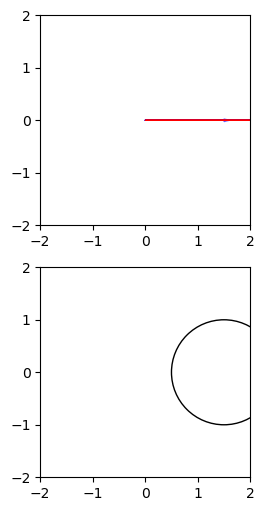

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the shape to be traced (in this case, the letter 's')
def s_shape(t):
    x = np.cos(t) * (1 + 0.5 * np.cos(3 * t))
    y = np.sin(t) * (1 + 0.5 * np.cos(3 * t))
    return x, y

# Define the number of epicycles and their frequencies
n_epicycles = 10
frequencies = np.arange(1, n_epicycles + 1)

# Create a figure and axis for the animation
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Initialize the axis limits and aspect ratio
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(-2, 2)
ax[0].set_aspect('equal')

ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].set_aspect('equal')

# Animation function
def animate(t):
    ax[0].clear()
    ax[1].clear()
    
    ax[0].set_xlim(-2, 2)
    ax[0].set_ylim(-2, 2)
    ax[0].set_aspect('equal')

    ax[1].set_xlim(-2, 2)
    ax[1].set_ylim(-2, 2)
    ax[1].set_aspect('equal')
    
    x, y = s_shape(t)
    
    # Draw the vectors
    for i in range(n_epicycles):
        ax[0].arrow(0, 0, x * frequencies[i], y * frequencies[i], head_width=0.05, head_length=0.1, color='b', alpha=0.5)
        if i == n_epicycles - 1:
            ax[0].arrow(0, 0, x * frequencies[i], y * frequencies[i], head_width=0.05, head_length=0.1, color='r')
    
    # Draw the circles
    for i in range(n_epicycles):
        circle = plt.Circle((x * frequencies[i], y * frequencies[i]), 1 / frequencies[i], fill=False, color='k')
        ax[1].add_patch(circle)

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=np.linspace(0, 2 * np.pi, 128),
                              interval=50)

# Save the animation to an HTML file
ani.save('animation.html', writer='html')

print("Animation saved to animation.html")